#### 1. Feature Scaling: 표준화와 정규화

1.  Standardization 표준화: 평균이 0, 분산이 1

2.  Normalization 정규화: 개별 데이터의 크기를 모두 똑같은 단위로 변경. (0~1 사이의 값으로 변경)

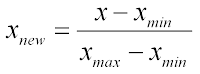

#### 2. 벡터 정규화 : 선형 대수 개념의 정규화
- : 사이킷런에서 제공하는 Normalizr모듈을 통한 정규화와 차이가 존재 (위의 정규화와 차이가 존재)
- : 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 

xi_new = xi / xi+yi+zi

In [ ]:
# 학습데이터와 테스트 데이터의 스케일링 변환시 유의점

"""
테스트 데이터셋으로는 댜시 fit을 수행하면 안됌!

학습데이터 세트로 fit()을 수행한 결과를 이용해 transform()변환을 적용해야 한다.
그렇지 않으면 기준 정보가 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있음.

"""

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 셋으로 분리
2. 1.이 불가능하다면 테스트 데이터 변환시에는 fit을 하지 않고, 학습데이터로 이미 fit()된 scaler객체를 이용하여 변환

# 1. StandardScaler

- 표준화를 지원
- 가우시안 정규 분포를 가질 수 있도록 데이터를 변환

- SVM, Linear Regression, Logistic Regression은 데이터가 가우시안 분포를 가지고 있다고 가정하에 구성되어있음. 따라서 표준화를 적용하면 예측 성능향상을 기대할 수 있음

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

#데이터 로드
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)

print('평균 값')
print(iris_df.mean())
print('분산')
print(iris_df.var())

평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [6]:
# standard scaling 수행

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_scaled

# transform사용시 numpy ndarray로 반환되므로 이를 df로 변환

iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
print('평균')
print(iris_df_scaled.mean())
print('분산')
print(iris_df_scaled.var())

# --> 평균이 0, 분산이 1에 가까운 값을 가짐.

평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


# 2. MinMax Scaler

- 개별 데이터의 크기를 모두 똑같은 단위로 변경. (0~1 사이의 값으로 변경)
- 데이터가 가우시안 분포가 아닐 경우, Min,Max scale을 적용해볼 수 있음

In [16]:
print('최솟값')
print(iris_df.min())
print('최대값')
print(iris_df.max())

최솟값
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64
최대값
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)


iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)

print('최솟값')
print(iris_df_scaled.min())
print('최대값')
print(iris_df_scaled.max())

최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
